# Step 1: Data Generation for SVD Project

In [22]:

# Import necessary libraries
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define users and items
users = ['U1', 'U2', 'U3', 'U4', 'U5']
items = ['Item1', 'Item2', 'Item3', 'Item4', 'Item5']

# Generate random ratings from 1 to 5
ratings = np.random.randint(1, 6, size=(len(users), len(items))).astype(float)

# Introduce some missing values (NaN) to simulate real-world scenario
ratings[1, 2] = np.nan  # U2 didn't rate Item3
ratings[3, 0] = np.nan  # U4 didn't rate Item1
ratings[4, 4] = np.nan  # U5 didn't rate Item5

# Create a pandas DataFrame
rating_matrix = pd.DataFrame(ratings, index=users, columns=items)

# Display the rating matrix
print("User-Item Rating Matrix:")
print(rating_matrix)


User-Item Rating Matrix:
    Item1  Item2  Item3  Item4  Item5
U1    4.0    5.0    3.0    5.0    5.0
U2    2.0    3.0    NaN    3.0    5.0
U3    4.0    3.0    5.0    2.0    4.0
U4    NaN    4.0    5.0    1.0    4.0
U5    2.0    5.0    4.0    1.0    NaN


## Step 2: Data Preprocessing

In [7]:
# Import library
from sklearn.impute import SimpleImputer

# Create an imputer to fill NaN with the mean of each column (item)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Apply imputer to the rating matrix
rating_matrix_filled = pd.DataFrame(imputer.fit_transform(rating_matrix),
                                    index=rating_matrix.index,
                                    columns=rating_matrix.columns)

# Display the processed matrix
print("Processed User-Item Rating Matrix (NaN replaced with column mean):")
print(rating_matrix_filled)


Processed User-Item Rating Matrix (NaN replaced with column mean):
    Item1  Item2  Item3  Item4  Item5
U1    4.0    5.0   3.00    5.0    5.0
U2    2.0    3.0   4.25    3.0    5.0
U3    4.0    3.0   5.00    2.0    4.0
U4    3.0    4.0   5.00    1.0    4.0
U5    2.0    5.0   4.00    1.0    4.5


## Step 3: Matrix Factorization with SVD

In [25]:

# Convert the DataFrame to a NumPy array
R = rating_matrix_filled.values

# Apply Singular Value Decomposition
U, sigma, Vt = np.linalg.svd(R, full_matrices=False)

# Convert sigma (1D array) to diagonal matrix
Sigma = np.diag(sigma)

# Display the shapes of the matrices
print("Shapes of decomposed matrices:")
print("U:", U.shape)
print("Sigma:", Sigma.shape)
print("Vt:", Vt.shape)

# Optional: Choose top k singular values for reconstruction (dimensionality reduction)
k = 2  # You can choose 2 or 3 for simplicity
U_k = U[:, :k]
Sigma_k = Sigma[:k, :k]
Vt_k = Vt[:k, :]

# Reconstruct the rating matrix using top k singular values
R_reconstructed = np.dot(U_k, np.dot(Sigma_k, Vt_k))

# Convert back to DataFrame for readability
R_reconstructed_df = pd.DataFrame(R_reconstructed, index=rating_matrix.index, columns=rating_matrix.columns)

print("\nReconstructed User-Item Rating Matrix using top", k, "singular values:")
print(R_reconstructed_df)


Shapes of decomposed matrices:
U: (5, 5)
Sigma: (5, 5)
Vt: (5, 5)

Reconstructed User-Item Rating Matrix using top 2 singular values:
       Item1     Item2     Item3     Item4     Item5
U1  3.777503  4.587234  3.206928  5.160493  5.237172
U2  2.914674  3.813880  3.810925  2.609330  4.281194
U3  2.904032  3.954936  4.551796  1.824720  4.401247
U4  2.743665  3.878181  4.990270  1.015569  4.282209
U5  2.749436  3.817246  4.664276  1.363244  4.230726


## Step 4: Evaluate the Reconstruction

In [29]:
# Step 4: Matrix Reconstruction Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Original matrix (after filling NaNs)
R_original = rating_matrix_filled.values

# Compute RMSE
rmse = np.sqrt(mean_squared_error(R_original, R_reconstructed))
# Compute MAE
mae = mean_absolute_error(R_original, R_reconstructed)

print("Evaluation Metrics for Reconstructed Matrix:")
print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))


Evaluation Metrics for Reconstructed Matrix:
RMSE: 0.565
MAE: 0.46


## Step 5: Visualization

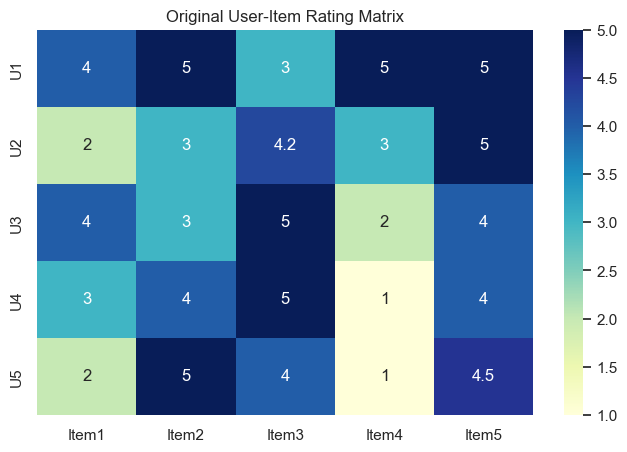

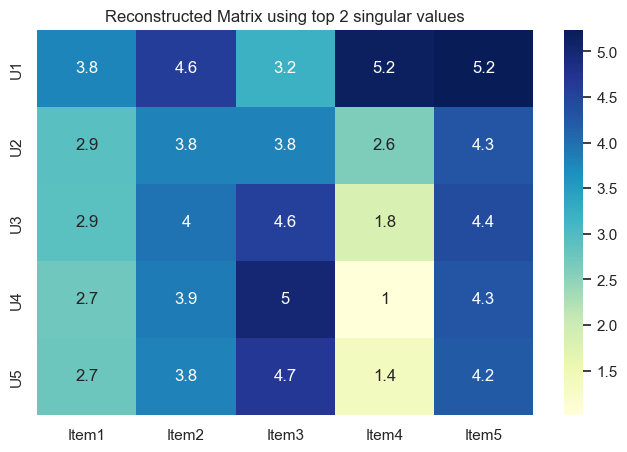

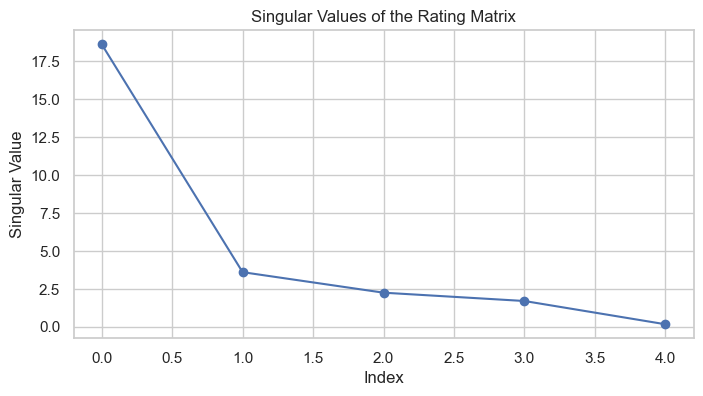

In [32]:
import matplotlib.pyplot as plt


# Set plot style
sns.set(style="whitegrid")

# 1. Heatmap of Original Rating Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(rating_matrix_filled, annot=True, cmap='YlGnBu', cbar=True)
plt.title("Original User-Item Rating Matrix")
plt.show()

# 2. Heatmap of Reconstructed Rating Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(R_reconstructed_df, annot=True, cmap='YlGnBu', cbar=True)
plt.title(f"Reconstructed Matrix using top {k} singular values")
plt.show()

# 3. Plot Singular Values
plt.figure(figsize=(8, 4))
plt.plot(sigma, marker='o')
plt.title("Singular Values of the Rating Matrix")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.grid(True)
plt.show()


## Summary of the Project

We implemented Matrix Factorization using Singular Value Decomposition (SVD) on a small synthetic user-item dataset.

Steps performed:

Data Generation – Created a 5×5 user-item rating matrix with some missing values.

Data Preprocessing – Filled missing values with column means.

SVD Factorization – Decomposed the matrix into U, Σ, and V^T.

Matrix Reconstruction – Reconstructed the matrix using top k=2 singular values.

Evaluation – Calculated RMSE and MAE to measure reconstruction accuracy.

Visualization – Plotted heatmaps and singular values for clarity.

## Key Results

Original vs Reconstructed Matrix: Close approximation, showing SVD captured the latent patterns.

Evaluation Metrics:

RMSE: 0.565

MAE: 0.46

Singular Values: Top 2 singular values captured most of the variance → using k=2 is sufficient for this dataset.

## Insights

Matrix Factorization with SVD is a powerful technique for:

Recommender Systems (predict missing ratings)

Dimensionality Reduction (reduce data complexity)

Noise Reduction (smooths out small fluctuations in ratings)

Even with a small dataset, SVD reveals latent features that explain user preferences.

Choosing top k singular values balances accuracy and simplicity.

## Future Work / Extensions

Apply SVD on larger real-world datasets (e.g., retail sales, online course ratings).

Use weighted imputation instead of mean for better predictions.

Integrate with recommendation algorithms to suggest items to users.

Compare with other factorization methods like NMF (Non-negative Matrix Factorization).